# **Breast cancer diagnosis - binary classification**
### **Abdallah Fekry**
**Model 13**

---

class 0 = Benign

class 1 = Malignant

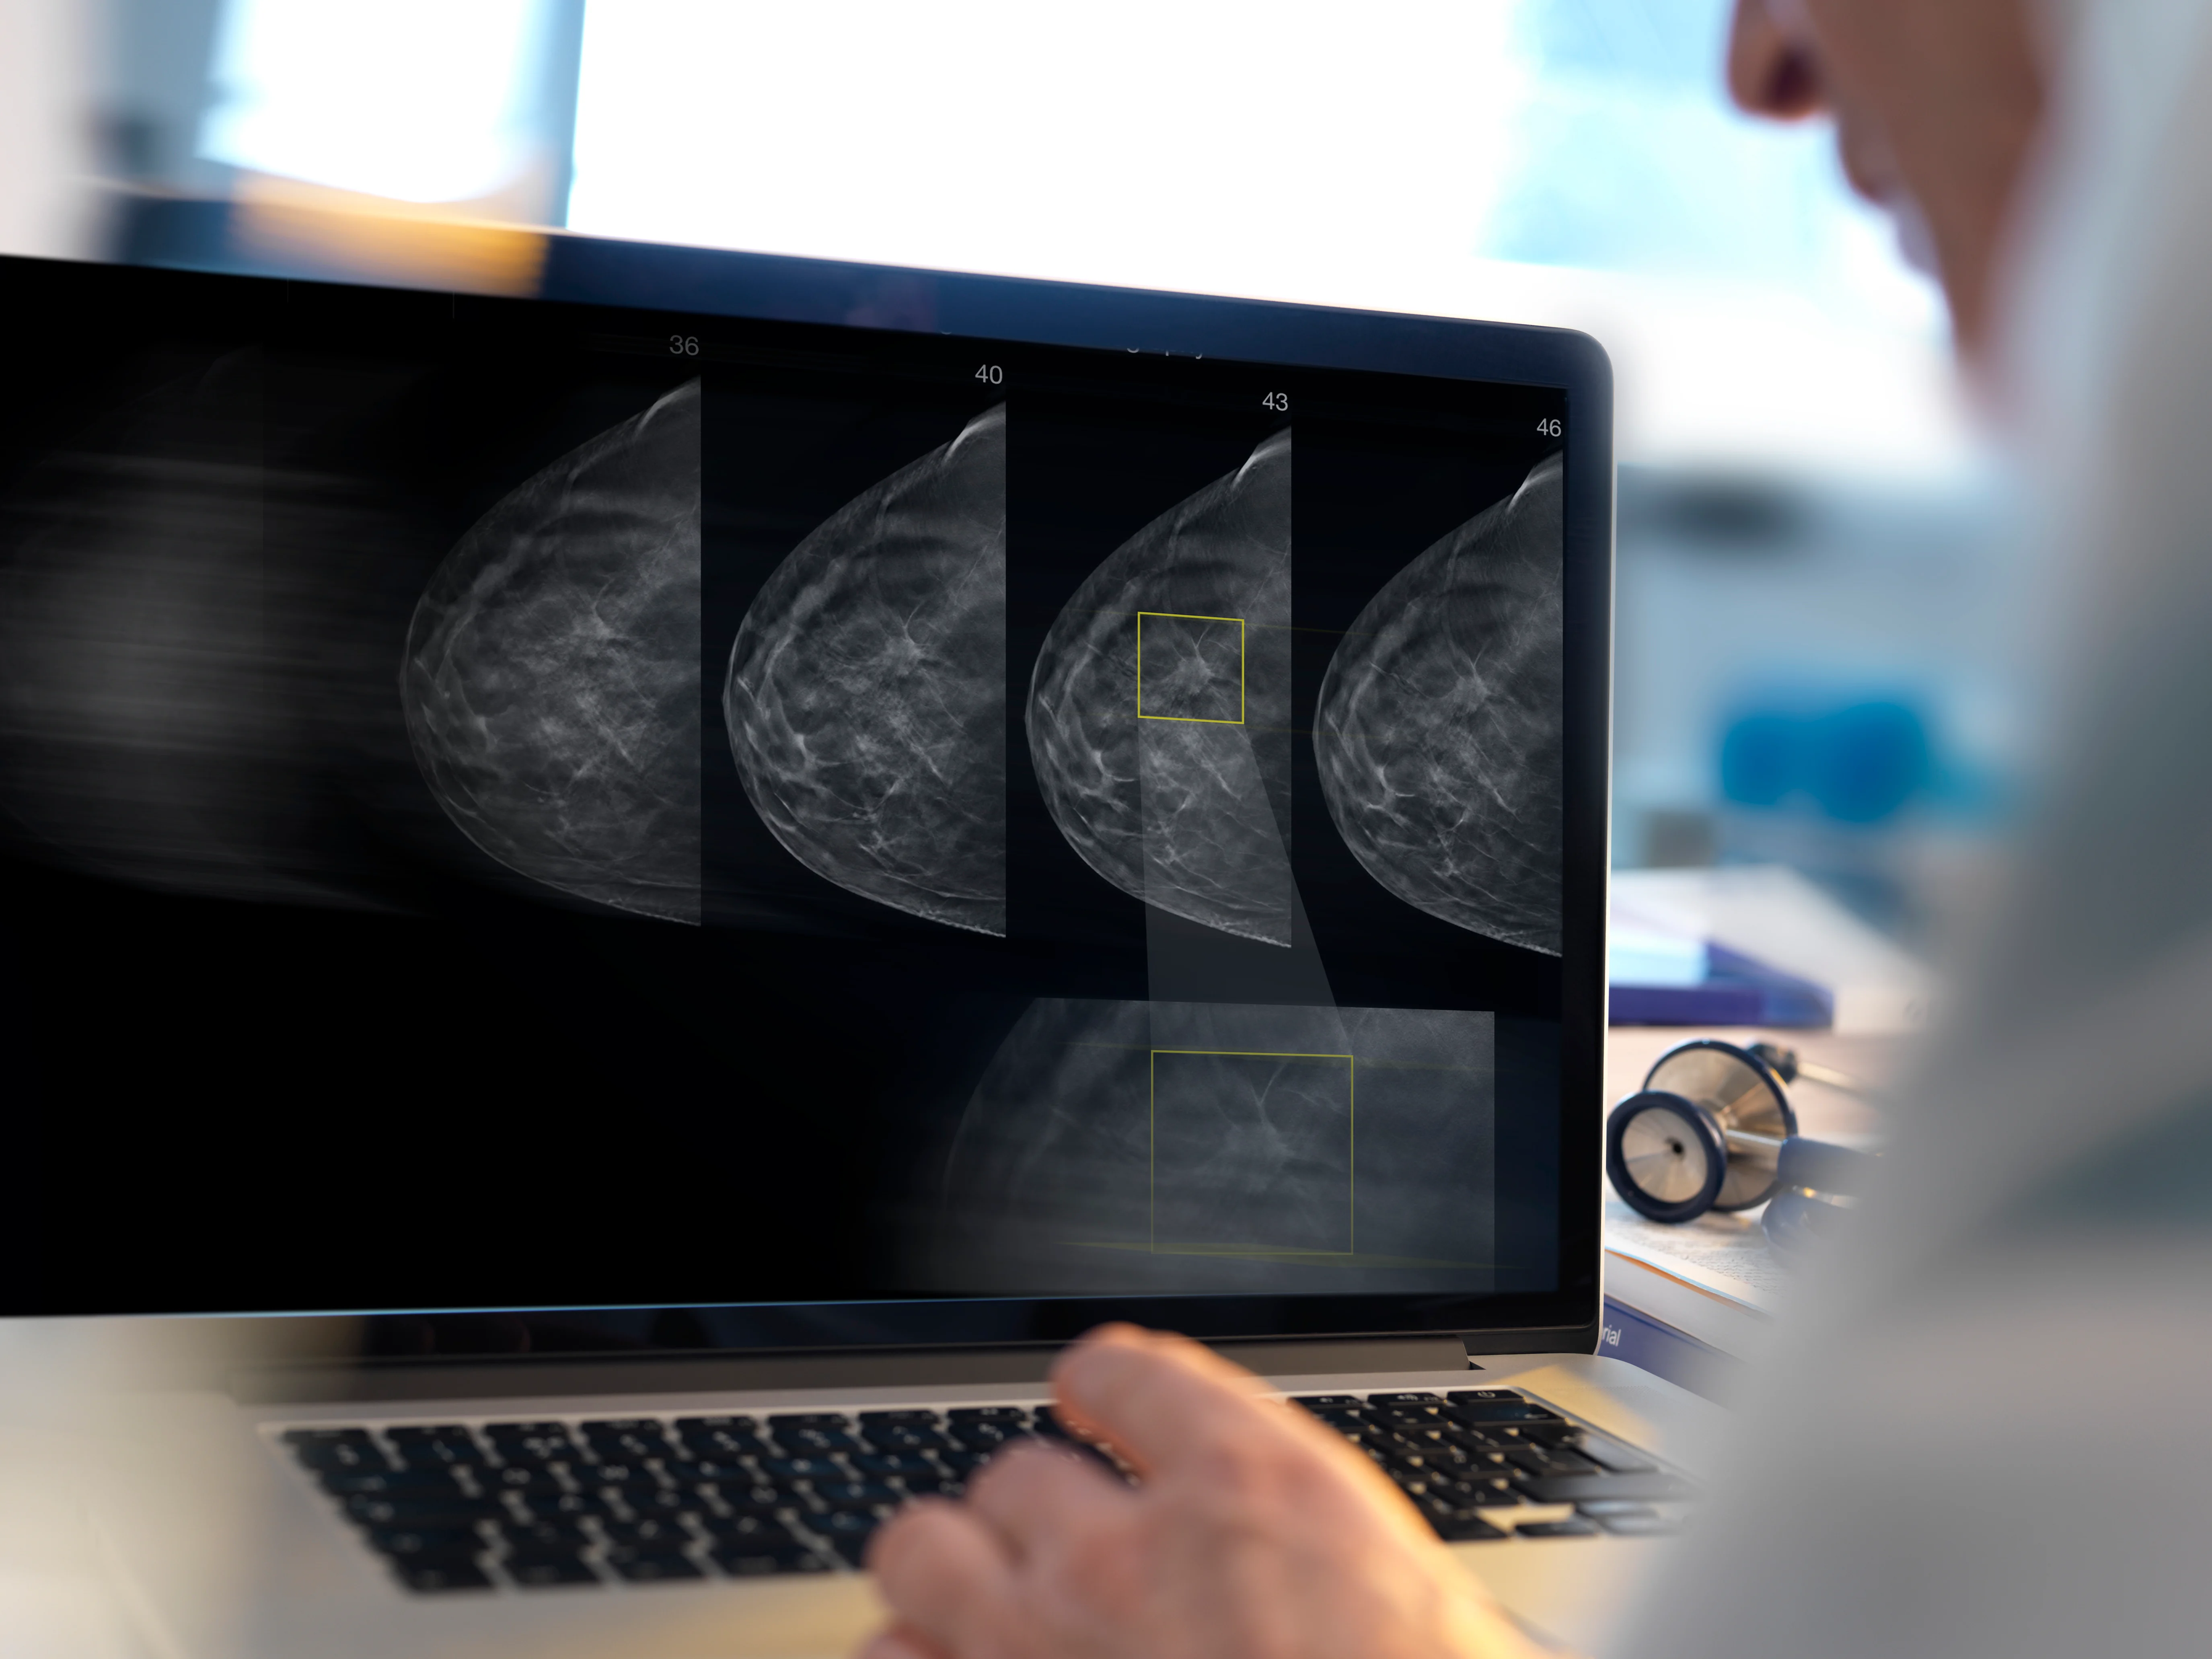

In [1]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [7]:
import keras
keras.__version__

'2.15.0'

In [3]:
classes = {0 : 'Benign',
           1 : 'Malignant'}

In [4]:
classes[0]

'Benign'

importing libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/breast-cancer-diagnosis/breast-cancer-dataset/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
test_data = train_datagen.flow_from_directory('/kaggle/input/breast-cancer-diagnosis/breast-cancer-dataset/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

Found 1280 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [9]:
train_data.image_shape

(224, 224, 3)

In [10]:
train_data.class_indices

{'Benign': 0, 'Malignant': 1}

In [11]:
np.unique(test_data.labels)

array([0, 1], dtype=int32)

In [55]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [56]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [57]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_6 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 134264641 (512.18 MB)
Trainable params: 

In [15]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [58]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy','Recall'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=10,monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/100
40/40 [==============================] - 17s 381ms/step - loss: 6.1377 - accuracy: 0.5961 - recall: 0.6469 - val_loss: 0.8429 - val_accuracy: 0.5000 - val_recall: 1.0000
Epoch 2/100
40/40 [==============================] - 14s 349ms/step - loss: 0.5884 - accuracy: 0.6852 - recall: 0.7453 - val_loss: 0.7892 - val_accuracy: 0.5042 - val_recall: 0.5083
Epoch 3/100
40/40 [==============================] - 14s 352ms/step - loss: 0.3587 - accuracy: 0.8359 - recall: 0.8328 - val_loss: 1.3361 - val_accuracy: 0.5250 - val_recall: 0.8750
Epoch 4/100
40/40 [==============================] - 14s 344ms/step - loss: 0.3250 - accuracy: 0.8758 - recall: 0.9234 - val_loss: 1.3112 - val_accuracy: 0.5875 - val_recall: 0.8333
Epoch 5/100
40/40 [==============================] - 14s 337ms/step - loss: 0.3280 - accuracy: 0.8641 - recall: 0.8750 - val_loss: 1.3937 - val_accuracy: 0.4875 - val_recall: 0.8333
Epoch 6/100
40/40 [==============================] - 14s 350ms/step - loss: 0.3138 - accur

In [59]:
model.evaluate(train_data)

40/40 [==============================] - 11s 263ms/step - loss: 0.0862 - accuracy: 0.9609 - recall: 0.9234


[0.08618927001953125, 0.9609375, 0.9234374761581421]

In [60]:
loss, acc, recall = model.evaluate(test_data)

8/8 [==============================] - 3s 292ms/step - loss: 0.7527 - accuracy: 0.7833 - recall: 0.8083


In [62]:
loss, acc, recall = model.evaluate(test_data)

8/8 [==============================] - 2s 276ms/step - loss: 0.7527 - accuracy: 0.7833 - recall: 0.8083


In [63]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,'\nRecall = ',round(recall*100,2),'%',sep='')

Test accuracy = 78.33%
Loss = 0.752738356590271
Recall = 80.83%


In [30]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers
densenet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3))
model2 = Sequential()
model2.add(densenet)
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dropout(0.5))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_1  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1920)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 1920)              7680      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 1921      
                                                                 
Total params: 18331585 (69.93 MB)
Trainable params: 18

In [31]:
from keras.optimizers import Adam
model2.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy','Recall'])
from tensorflow.keras.callbacks import EarlyStopping
results2 = model2.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=10,monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/100
40/40 [==============================] - 186s 896ms/step - loss: 0.8219 - accuracy: 0.4945 - recall: 0.4953 - val_loss: 0.9109 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 24s 596ms/step - loss: 0.7926 - accuracy: 0.5039 - recall: 0.4953 - val_loss: 0.7487 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 24s 599ms/step - loss: 0.7818 - accuracy: 0.4922 - recall: 0.4938 - val_loss: 0.7378 - val_accuracy: 0.3875 - val_recall: 0.1500
Epoch 4/100
40/40 [==============================] - 25s 617ms/step - loss: 0.7754 - accuracy: 0.4984 - recall: 0.5141 - val_loss: 0.7351 - val_accuracy: 0.4125 - val_recall: 0.5250
Epoch 5/100
40/40 [==============================] - 25s 616ms/step - loss: 0.7640 - accuracy: 0.4977 - recall: 0.4984 - val_loss: 0.7157 - val_accuracy: 0.4583 - val_recall: 0.8917
Epoch 6/100
40/40 [==============================] - 25s 612ms/step - loss: 0.763

Winner is model1 which have VGG-16 architecture

---

In [64]:
results.history['val_accuracy']

[0.5,
 0.5041666626930237,
 0.5249999761581421,
 0.5874999761581421,
 0.48750001192092896,
 0.6208333373069763,
 0.7041666507720947,
 0.6499999761581421,
 0.4208333194255829,
 0.7208333611488342,
 0.6791666746139526,
 0.5625,
 0.7833333611488342,
 0.6625000238418579,
 0.7541666626930237,
 0.637499988079071,
 0.7083333134651184,
 0.6958333253860474,
 0.7291666865348816,
 0.7333333492279053,
 0.7333333492279053,
 0.7291666865348816,
 0.7333333492279053]

In [65]:
results.history['val_loss']

[0.8429328203201294,
 0.7891553640365601,
 1.3360697031021118,
 1.3112332820892334,
 1.3937188386917114,
 1.1421939134597778,
 0.8221184611320496,
 1.1688514947891235,
 2.418708086013794,
 0.6415287256240845,
 1.1348650455474854,
 1.542650818824768,
 0.752738356590271,
 1.1183162927627563,
 0.8535345792770386,
 1.39707350730896,
 1.5287004709243774,
 1.242910623550415,
 1.5760098695755005,
 1.679404616355896,
 1.7719652652740479,
 1.861041784286499,
 1.830797553062439]

In [66]:
i = results.history['val_loss'].index(loss)
i

12

In [67]:
results.history['val_accuracy'][i]

0.7833333611488342

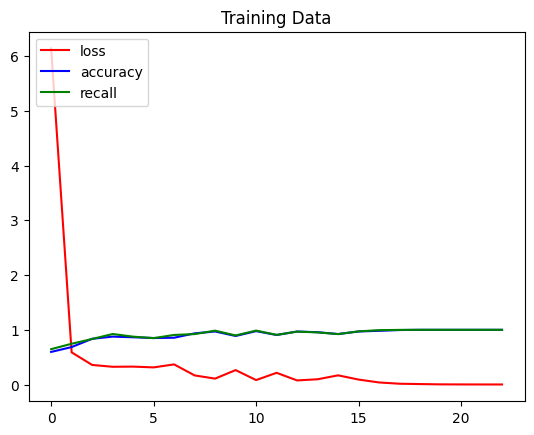

In [69]:
fig = plt.figure()
plt.plot(results.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.plot(results.history['recall'], c='green', label='recall')
plt.title("Training Data")
plt.legend(loc="upper left")
plt.show()

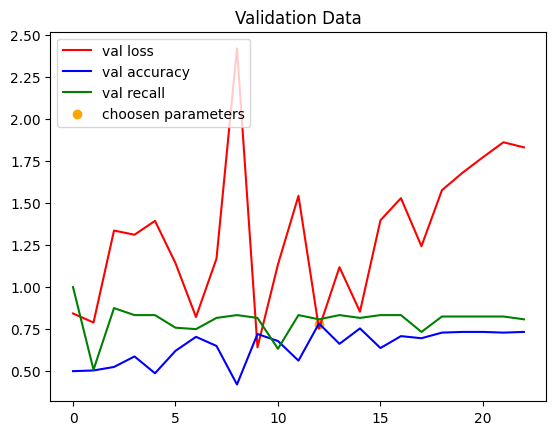

In [70]:
fig = plt.figure()
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_recall'], c='green', label='val recall')
plt.scatter(i ,results.history['val_accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="upper left")
plt.show()

In [71]:
yp = (model.predict(test_data)>=0.5).astype(int)
yp.shape

8/8 [==============================] - 2s 271ms/step


(240, 1)

In [72]:
yp = yp.reshape(-1,)
yp

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

Benign


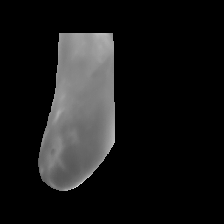

In [73]:
print("Benign")
b = load_img('/kaggle/input/breast-cancer-diagnosis/breast-cancer-dataset/Train/Benign/PAC_00_DN0-dir.png',target_size=(224,224))
# plt.imshow()
b

Malignant


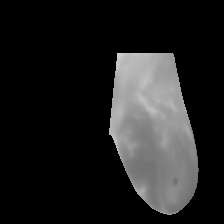

In [74]:
print('Malignant')
m = load_img('/kaggle/input/breast-cancer-diagnosis/breast-cancer-dataset/Train/Malignant/PAC_11_DN4-esq.png',target_size=(224,224))
# plt.imshow(img_normal)
m

Text(0.5, 1.0, 'Malignant')

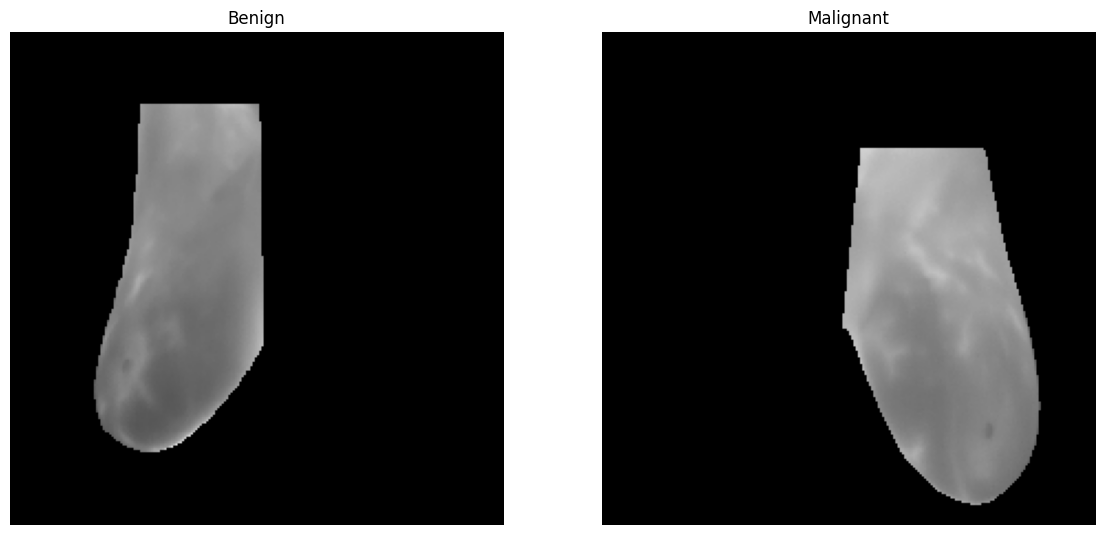

In [75]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(b)
plt.title('Benign')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(m)
plt.title('Malignant')

In [76]:
b = img_to_array(b)
m = img_to_array(m)
b = b/255
m = m/255
b = b.reshape(1,224,224,3)
m = m.reshape(1,224,224,3)
m.shape

(1, 224, 224, 3)

In [77]:
p1 = (model.predict(b)>=0.5).astype(int)[0,0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 1s 1s/step
Class 0: Benign


In [78]:
p1 = (model.predict(m)>=0.5).astype(int)[0,0]

print("Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 24ms/step
Class 1: Malignant


In [79]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,Benign/PAC_61_DN0-esq.png,0,1
1,Benign/PAC_61_DN1-esq.png,0,1
2,Benign/PAC_61_DN10-esq.png,0,1
3,Benign/PAC_61_DN11-esq.png,0,1
4,Benign/PAC_61_DN12-esq.png,0,0
...,...,...,...
235,Malignant/PAC_69_DN7-esq.png,1,1
236,Malignant/PAC_69_DN8-dir.png,1,0
237,Malignant/PAC_69_DN8-esq.png,1,1
238,Malignant/PAC_69_DN9-dir.png,1,0


In [80]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [81]:
m = confusion_matrix(test_data.labels,yp)
m

array([[91, 29],
       [23, 97]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

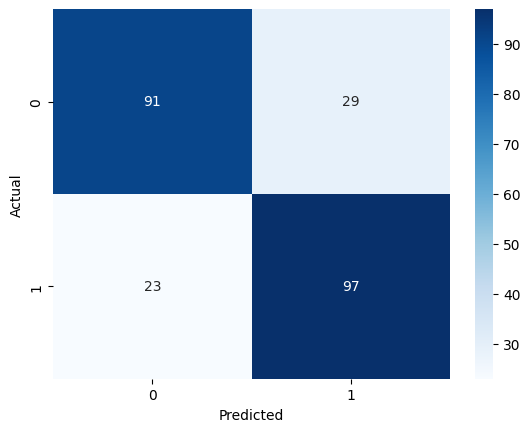

In [82]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

**Clssification Report**

In [83]:
from sklearn.metrics import classification_report
classification_report(test_data.labels, yp)

'              precision    recall  f1-score   support\n\n           0       0.80      0.76      0.78       120\n           1       0.77      0.81      0.79       120\n\n    accuracy                           0.78       240\n   macro avg       0.78      0.78      0.78       240\nweighted avg       0.78      0.78      0.78       240\n'

---

In [84]:
model.save('model10.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model10.h5')

/kaggle/working


/kaggle/working/model10.h5